# Classifying Movie Genre Based on Plot Summary

#### IMDB movie data
#### 5000 movies 
#### 21 Different Genres

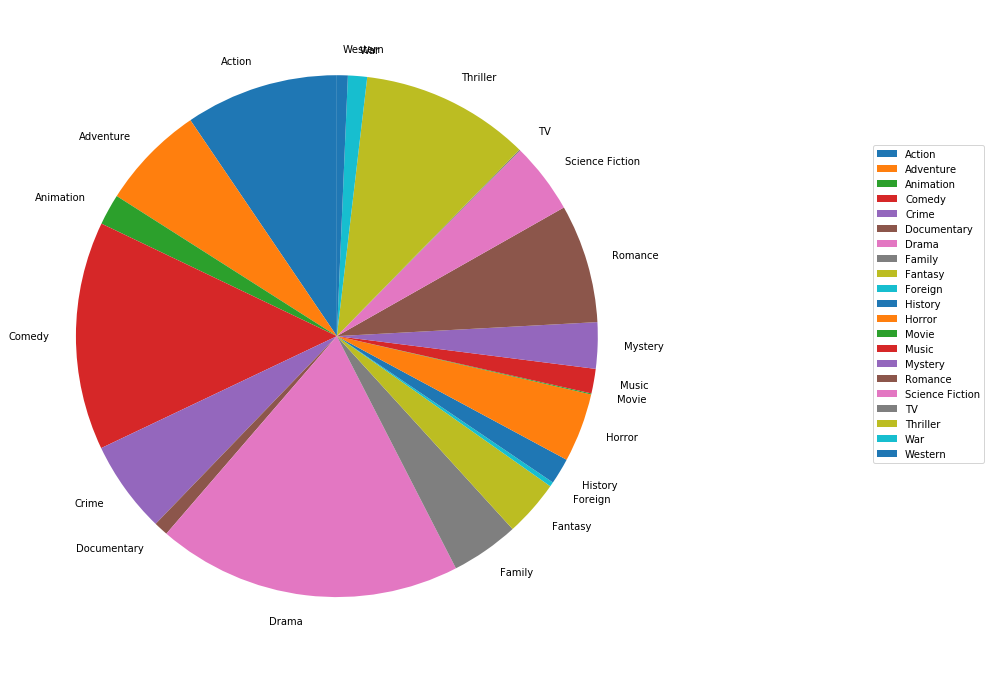

In [46]:
labels = target_df.columns
sizes = [target_df[x].sum() for x in labels]
plt.figure(figsize=(20, 12))

plt.pie(sizes,labels=labels, startangle=90)

plt.legend(loc='upper right', bbox_to_anchor=(1.5,0.8))
plt.show()


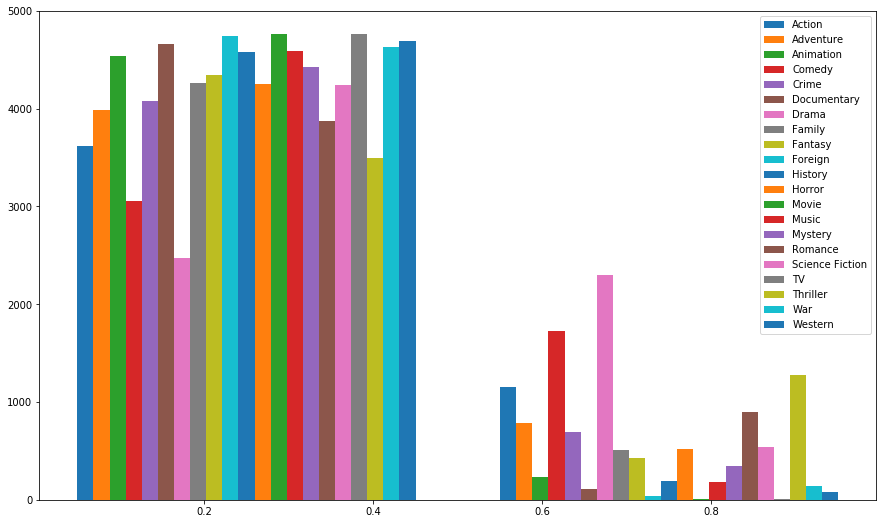

In [20]:
# feat = data.loc[:, 'feat_1':'feat_30']
# feat.hist(figsize=(30,20));
labels = target_df.columns

target_df=target_df.astype(int)

plt.figure(figsize=(15,9))
plt.hist([target_df[i] for i in target_df.columns], bins=2, label= labels)
plt.legend()

# FINAL TARGETS (GENRES)

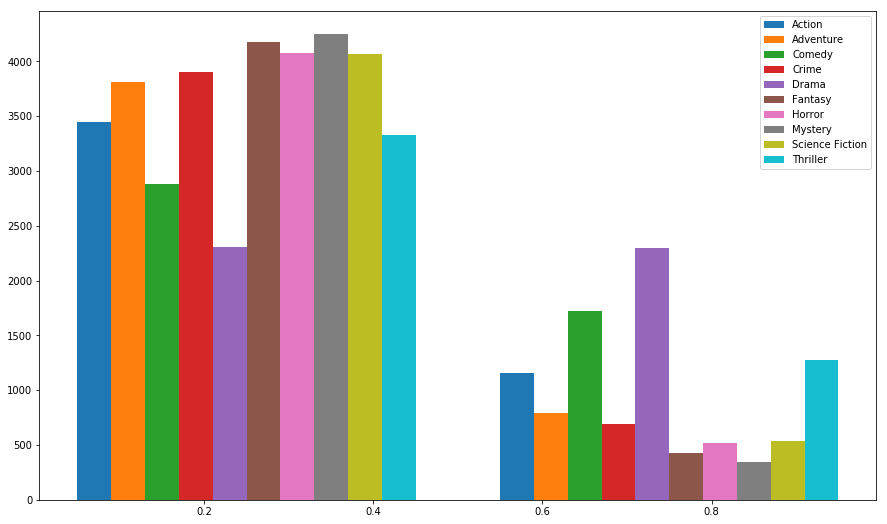

In [11]:
labels = ('Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror',
       'Mystery', 'Science Fiction', 'Thriller')

data1=data.iloc[:,5:-1].astype(int)
plt.figure(figsize=(15,9))
plt.hist([data1[i] for i in labels], bins=2, label= labels)
plt.legend()





## Correlation Between Genres

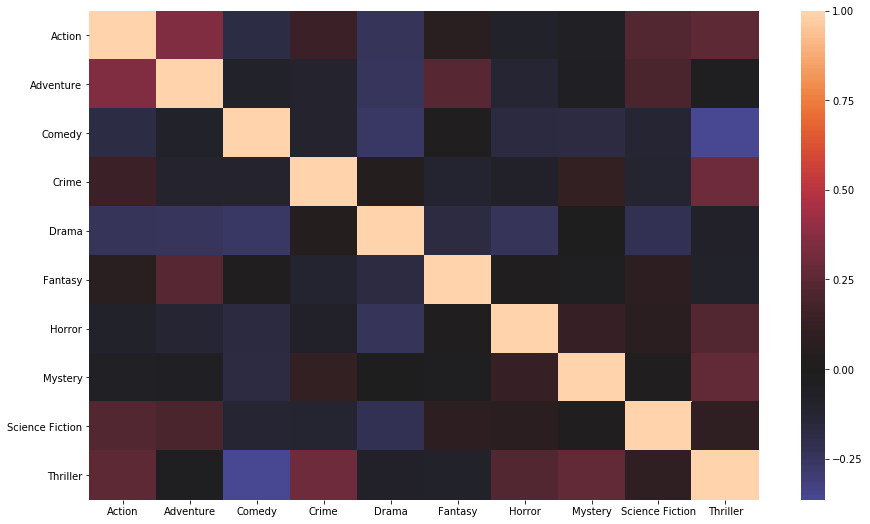

In [12]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(data1.corr(), center=0)


# Feature Engineering

### Using TfIDF to calculate all unique stems 
### Number of columns in our TfIDF data set 14302

# MODELS 

In [ ]:
pipe_rf = Pipeline([('tf_idf_vectorizer',TfidfVectorizer()),
                   ('multi',MultiOutputClassifier(RandomForestClassifier(n_jobs=-1)))])

parameters = {'tf_idf_vectorizer__ngram_range': [(1,1),(1,2)],
              'tf_idf_vectorizer__max_features': [1000,2000,5000],
              'multi__estimator__n_estimators':[10,20,50,100],
             'multi__estimator__max_features':['auto',5,20]}

model_grid = GridSearchCV(pipe_rf,parameters,n_jobs=-1)

#### Pipeline to set up the work flow : TfIDF --> MultiOutputClassifier--> Classifier --> GridSearch

#### Three classifiers: Random Forest, SVC, SGD


# SVC
#### Best Params 

{'multi__estimator__C': 1,
 'multi__estimator__kernel': 'linear',
 'tf_idf_vectorizer__max_features': 5000,
 'tf_idf_vectorizer__ngram_range': (1, 1)}
#### Score 12% 

# Conclusion: 

#### Need to take care of class imbalance 
#### Possibly use an ensemble model to take votes from various models for final decision
#### Better quality of data 

In [2]:
import pandas as pd
df = pd.read_csv('tmdb_5000_movies.csv')
import re

to_drop = ['budget', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average',
       'vote_count']
df1 = df.drop(to_drop, axis=1)
df1.shape

(4803, 3)

In [3]:
df2 = df1.dropna()
blanks = df2[df2.genres == '[]']
print(f'blanks shape: {blanks.shape}. So we will drop all 28 rows because they had missing genres')
df2 = df2[df.genres != '[]']
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
print(f'df2 shape after dropping rows with empty lists: {df2.shape}')
print('df2 index:', df2.index)
#checking if any empty lists left
print(df2[df2.genres == '[]'])
print(df2[df2.overview == '[]'])


blanks shape: (28, 3). So we will drop all 28 rows because they had missing genres
df2 shape after dropping rows with empty lists: (4772, 3)
df2 index: RangeIndex(start=0, stop=4772, step=1)
Empty DataFrame
Columns: [genres, overview, title]
Index: []
Empty DataFrame
Columns: [genres, overview, title]
Index: []


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [4]:
regex = r"[A-Z][a-z ]*[A-Za-z]*"
#generating list of genres for each movie using regex pattern
genres_list = [re.findall(regex, genres) for genres in df2.genres]

#Unique list of genres
genres = set([genre for genres in genres_list for genre in genres])

#function that creates a list of dictionary with each genre as key with value of weather the movie falls in that genre or not as true or false
def find_genres(movie_genres):
    features = {}
    for w in genres:
        features[w] = (w in movie_genres)
    return features

#list of class dictionary using the above function 
targets = [find_genres(g) for g in genres_list]

#new df of all classes
target_df = pd.DataFrame(targets)

In [5]:
df2['tokenized_genres'] = genres_list
df2['count_genre'] = [len(x) for x in df2['tokenized_genres']]
# df2['string'] = [' '.join(g)  for g in df2['tokenized_genres']]
print(df2.iloc[1000].genres)
print(df2.iloc[1000].tokenized_genres)
#JOINING THE TARGET DF WITH THE MAIN DF 
df3 = pd.concat([df2, target_df], axis=1)
genres_drops =['TV', 'Movie', 'Foreign', 'Western', 'Documentary', 'History', 'Music', 'Animation', 'War', 'Family', 'Romance']
df3 = df3.drop(genres_drops, axis = 1)
#After dropping all the genres above we still had some rows that fell in those genres only. So we are dropping them below. 
df6 = df3[(df3.Action==False)&(df3.Adventure==False)&(df3.Comedy == False)
    &(df3.Crime == False)&(df3.Drama == False)&(df3.Fantasy == False)
   &(df3.Horror == False)&(df3.Mystery == False)&(df3['Science Fiction'] == False)&(df3.Thriller == False)]
df7 = df3.drop(list(df6.index))

[{"id": 14, "name": "Fantasy"}, {"id": 53, "name": "Thriller"}, {"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}]
['Fantasy', 'Thriller', 'Action', 'Crime']


In [6]:
df7.shape
df7 = df7.reset_index()
df7 = df7.drop(['index'], axis=1)
df7['count_ov'] = [len(x.split()) for x in df7.overview]
df7[(df7['count_ov']==0)].overview
df7 = df7.drop(4269)
df7.reset_index()
df7[(df7['count_ov']==0)]
######################### STOP BEFORE FEATURE ENGINEERING

,genres,overview,title,tokenized_genres,count_genre,Action,Adventure,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Science Fiction,Thriller,count_ov


In [7]:
data= df7

In [8]:
data.columns

Index(['genres', 'overview', 'title', 'tokenized_genres', 'count_genre',
       'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror',
       'Mystery', 'Science Fiction', 'Thriller', 'count_ov'],
      dtype='object')

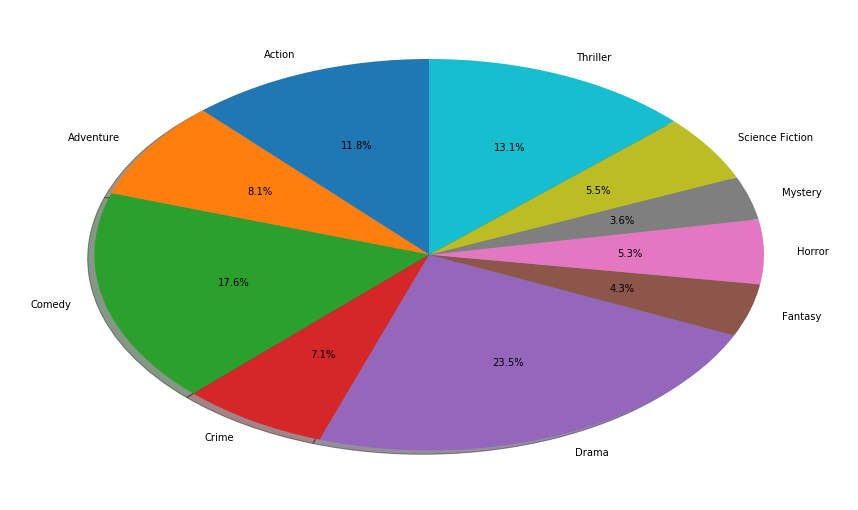

In [9]:
import matplotlib.pyplot as plt
labels = ('Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror',
       'Mystery', 'Science Fiction', 'Thriller')
sizes = [data[x].sum() for x in labels]
plt.figure(figsize=(15,9))

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
